In [1]:
import pandas as pd   #used for data manipulation and analysis.
from sklearn.model_selection import train_test_split  #used to split the dataset into training and testing sets, 
from sklearn.preprocessing import StandardScaler #StandardScaler normalizes (scales) numerical features to have a mean of 0 and a standard deviation of 1
from sklearn.linear_model import LogisticRegression # This is the machine learning model that will be trained to classify data (e.g., predicting churn or not churn based on features)
from sklearn.metrics import accuracy_score, confusion_matrix #showing True Positives, True Negatives, False Positives, and False Negatives.



In [3]:
# Load dataset
#dataset likely contains information about telecommunication customers
#"Churn" = "Yes" → The customer left the service.
#"Churn" = "No" → The customer is still using the service.
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Data Preprocessing
#customerID is just a unique identifier and does not contribute to predicting churn.Keeping it would only add unnecessary noise to the model.
df.drop(columns=["customerID"], inplace=True)
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
'''Converts the "TotalCharges" column from string (object) to numeric (float or int).

If a value cannot be converted, it replaces it with NaN (missing value).

Why it's needed:
In the original dataset, "TotalCharges" is often stored as a string, but it represents a numeric value.

Some rows might have empty spaces ("") instead of numbers, causing conversion issues.

Using errors="coerce" ensures that invalid values are replaced with NaN, rather than causing an error. '''

'Converts the "TotalCharges" column from string (object) to numeric (float or int).\n\nIf a value cannot be converted, it replaces it with NaN (missing value).\n\nWhy it\'s needed:\nIn the original dataset, "TotalCharges" is often stored as a string, but it represents a numeric value.\n\nSome rows might have empty spaces ("") instead of numbers, causing conversion issues.\n\nUsing errors="coerce" ensures that invalid values are replaced with NaN, rather than causing an error. '

In [11]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.head(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [13]:
df["TotalCharges"].fillna(0, inplace=True)
df.head(6)

C:\Users\ashok\AppData\Local\Temp\ipykernel_4004\3222747803.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(0, inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [15]:
# Convert Yes/No columns to 1/0
#machine learning models work better with numerical data 0,1
yes_no_columns = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for col in yes_no_columns:
    df[col] = df[col].map({"Yes": 1, "No": 0})

In [17]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,Female,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,Male,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,Female,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,Female,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,Male,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [20]:
# One-Hot Encoding
'''
Machine learning algorithms can't process categorical values with multiple classes (e.g., DSL, Fiber optic, and No for "InternetService") directly.
One-Hot Encoding converts these into separate binary columns, which models can process effectively.
drop_first=True avoids creating a multicollinearity issue by dropping one of the categories as a reference column (to prevent redundancy).
'''
df_encoded = pd.get_dummies(df, columns=["InternetService", "Contract", "PaymentMethod"], drop_first=True) #InternetService =(Fiber optic,No)-true  ,NSL-false same "Contract", "PaymentMethod "  
df_encoded.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,No phone service,No,Yes,No,...,29.85,29.85,0,False,False,False,False,False,True,False
1,Male,0,0,0,34,1,No,Yes,No,Yes,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,Male,0,0,0,2,1,No,Yes,Yes,No,...,53.85,108.15,1,False,False,False,False,False,False,True
3,Male,0,0,0,45,0,No phone service,Yes,No,Yes,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,Female,0,0,0,2,1,No,No,No,No,...,70.70,151.65,1,True,False,False,False,False,True,False
5,Female,0,0,0,8,1,Yes,No,No,Yes,...,99.65,820.50,1,True,False,False,False,False,True,False
6,Male,0,0,1,22,1,Yes,No,Yes,No,...,89.10,1949.40,0,True,False,False,False,True,False,False
7,Female,0,0,0,10,0,No phone service,Yes,No,No,...,29.75,301.90,0,False,False,False,False,False,False,True
8,Female,0,1,0,28,1,Yes,No,No,Yes,...,104.80,3046.05,1,True,False,False,False,False,True,False
9,Male,0,0,1,62,1,No,Yes,Yes,No,...,56.15,3487.95,0,False,False,True,False,False,False,False


In [22]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
df_encoded.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [27]:
# Split data into features (X) and target (y)
'''
X (Features): These are the input variables that your model will use to make predictions (e.g., customer demographics, service details).
y (Target): This is the output variable you're trying to predict (in this case, whether the customer will churn or not, which is stored in the "Churn" column).

Feature columns (X) represent the independent variables used for prediction.
Target column (y) is the dependent variable, which is what the model will learn to predict based on the features.
Machine learning models require a clear distinction between the features and the target variable to train and evaluate the model.
'''



X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]


In [29]:
X.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,No phone service,No,Yes,No,...,1,29.85,29.85,False,False,False,False,False,True,False
1,Male,0,0,0,34,1,No,Yes,No,Yes,...,0,56.95,1889.50,False,False,True,False,False,False,True
2,Male,0,0,0,2,1,No,Yes,Yes,No,...,1,53.85,108.15,False,False,False,False,False,False,True
3,Male,0,0,0,45,0,No phone service,Yes,No,Yes,...,0,42.30,1840.75,False,False,True,False,False,False,False
4,Female,0,0,0,2,1,No,No,No,No,...,1,70.70,151.65,True,False,False,False,False,True,False


In [31]:
y.head(5)

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [33]:
# Split into training and testing data
'''
Purpose:
The goal of this step is to split the data into:
Training data (X_train, y_train): Used to train the model.
Testing data (X_test, y_test): Used to evaluate the model after training.
Why It's Needed:
Training the model: We train the model on the training data to learn the relationship between the features (X_train) and the target (y_train).
Testing the model: After training, we use the testing data to evaluate how well the model generalizes to new, unseen data. This helps assess the model's performance.

test_size=0.2: 20% of the data is allocated to the test set, and 80% is used for training.
'''


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,Female,0,0,1,21,1,No,Yes,No,Yes,...,0,64.85,1336.80,False,False,True,False,False,False,True
1623,Female,0,0,0,54,1,Yes,No,Yes,No,...,1,97.20,5129.45,True,False,False,True,False,False,False
6074,Male,0,1,0,1,0,No phone service,No,No,No,...,1,23.45,23.45,False,False,False,False,False,True,False
1362,Male,0,0,0,4,1,No,No,No,No,...,1,70.20,237.95,True,False,False,False,False,True,False
6754,Male,0,0,1,0,1,Yes,Yes,Yes,No,...,1,61.90,0.00,False,False,False,True,False,False,False
1212,Male,0,0,0,7,1,No,No,No,No,...,1,69.55,521.35,True,False,False,False,False,True,False
2722,Male,0,1,1,32,1,No,No internet service,No internet service,No internet service,...,0,18.95,613.95,False,True,False,True,False,False,True
4006,Male,0,1,1,72,1,No,No internet service,No internet service,No internet service,...,1,19.80,1414.65,False,True,False,True,True,False,False
6791,Male,0,0,0,19,0,No phone service,No,No,Yes,...,1,39.65,733.35,False,False,False,False,False,True,False
5466,Male,0,0,1,10,1,No,No internet service,No internet service,No internet service,...,1,19.95,219.50,False,True,True,False,False,False,False


In [37]:
y_train.head(10)

2142    0
1623    0
6074    1
1362    1
6754    0
1212    0
2722    0
4006    0
6791    1
5466    0
Name: Churn, dtype: int64

In [39]:
X_test.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,Female,0,1,0,1,0,No phone service,No,No,No,...,1,24.80,24.80,False,False,False,False,False,True,False
2715,Male,0,0,0,41,1,Yes,No internet service,No internet service,No internet service,...,1,25.25,996.45,False,True,False,False,False,False,False
3825,Female,0,1,1,52,1,No,No internet service,No internet service,No internet service,...,0,19.35,1031.70,False,True,False,True,False,False,True
1807,Female,0,0,0,1,1,No,No,No,Yes,...,0,76.35,76.35,True,False,False,False,False,True,False
132,Male,0,0,0,67,1,No,No,No,No,...,0,50.55,3260.10,False,False,False,True,False,False,False
1263,Female,1,1,0,68,1,Yes,No,Yes,No,...,1,89.60,6127.60,True,False,False,False,False,False,False
3732,Female,0,1,1,23,1,Yes,Yes,No,Yes,...,1,77.15,1759.40,False,False,False,True,False,False,False
1672,Male,0,1,1,72,1,Yes,Yes,Yes,Yes,...,0,72.10,5016.65,False,False,False,True,True,False,False
811,Male,0,0,0,70,1,Yes,Yes,No,No,...,1,104.00,7250.15,True,False,False,True,True,False,False
2526,Male,0,0,0,1,1,No,No internet service,No internet service,No internet service,...,0,19.40,19.40,False,True,False,False,False,False,True


In [41]:
y_test.head(10)

185     1
2715    0
3825    0
1807    1
132     0
1263    1
3732    0
1672    0
811     1
2526    1
Name: Churn, dtype: int64

In [44]:
# Train a Logistic Regression model
'''
model = LogisticRegression()
model.fit(X_train,y_train) #we use that(( X_train,X_test)=compaine all data) data it occure like this is string data type we need to int or float so we use StandardScaler
'''

'\nmodel = LogisticRegression()\nmodel.fit(X_train,y_train) #we use that(( X_train,X_test)=compaine all data) data it occure like this is string data type we need to int or float so we use StandardScaler\n'

In [46]:
# Standardize numeric columns
'''
Many machine learning models (e.g., Logistic Regression, SVMs, KNN) perform better when the data is standardized.
Features with different scales (like tenure in months vs. TotalCharges in currency) can cause bias towards features with larger numerical values.
Standardization makes the optimization process more stable and faster.
'''
scaler = StandardScaler()
numeric_columns = X.select_dtypes(include=["float64", "int64"]).columns
X_train_scaled = scaler.fit_transform(X_train[numeric_columns]) #fit_transform computes the mean and standard deviation
X_test_scaled = scaler.transform(X_test[numeric_columns])




In [48]:
X_train_scaled

array([[-4.37749204e-01, -9.69578591e-01,  1.53218588e+00, ...,
        -1.20000722e+00, -4.73723375e-04, -4.19924521e-01],
       [-4.37749204e-01, -9.69578591e-01, -6.52662324e-01, ...,
         8.33328321e-01,  1.07475386e+00,  1.25601669e+00],
       [-4.37749204e-01,  1.03137591e+00, -6.52662324e-01, ...,
         8.33328321e-01, -1.37649913e+00, -1.00028321e+00],
       ...,
       [-4.37749204e-01,  1.03137591e+00,  1.53218588e+00, ...,
         8.33328321e-01, -1.45294499e+00, -8.75404569e-01],
       [ 2.28441306e+00, -9.69578591e-01, -6.52662324e-01, ...,
         8.33328321e-01,  1.14953785e+00, -4.80309046e-01],
       [-4.37749204e-01, -9.69578591e-01, -6.52662324e-01, ...,
        -1.20000722e+00, -1.49781538e+00, -8.08568424e-01]])

In [50]:
X_test_scaled 

array([[-0.4377492 ,  1.03137591, -0.65266232, ...,  0.83332832,
        -1.33162874, -0.99968666],
       [-0.4377492 , -0.96957859, -0.65266232, ...,  0.83332832,
        -1.31667194, -0.57032242],
       [-0.4377492 ,  1.03137591,  1.53218588, ..., -1.20000722,
        -1.51277218, -0.55474573],
       ...,
       [-0.4377492 ,  1.03137591,  1.53218588, ..., -1.20000722,
        -1.49449165, -0.86493173],
       [-0.4377492 ,  1.03137591,  1.53218588, ...,  0.83332832,
        -0.69513389,  0.29739856],
       [-0.4377492 , -0.96957859,  1.53218588, ...,  0.83332832,
        -1.11392424, -0.99679227]])

In [52]:
import pandas as pd
import numpy as np

In [54]:
###save X_test_scaled_y_test

In [107]:

'''
# Assuming X_train_scaled is a NumPy array and y_train is a Pandas Series or NumPy array

# Identify the numerical columns from X_train (these are the ones that were scaled)
numeric_columns = X.select_dtypes(include=["float64", "int64"]).columns

# Convert the scaled features (X_train_scaled) to a DataFrame with correct column names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numeric_columns)

# Convert the target labels (y_train) to a DataFrame or Series
y_test_df = pd.DataFrame(y_test, columns=["Churn"])


X_test_scaled_df .to_csv("X_test_scaled", index=False)
y_test_df.to_csv("y_test.csv", index=False)

print("Data has been saved to 'X_test_scaled_y_test.csv")
'''


Data has been saved to 'X_test_scaled_y_test.csv


In [59]:
# Train a Logistic Regression model
'''
Logistic Regression is a statistical method used for binary classification tasks (like predicting churn: Yes/No or 1/0).
In this case, it will learn the relationship between the features (X_train_scaled) and the target (y_train), so it can predict whether a customer will churn or not.
'''
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [61]:
score = model.score(X_train_scaled,y_train)
score 

0.7907348242811502

In [63]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
#predict particuler values
'''
row_to_predict = X_test_scaled[0:1]  # Change 0 to the index of the row you want

# Predict using the model
prediction = model.predict(row_to_predict)

# Print the prediction
print("Prediction for the selected row:", prediction)
'''

'\nrow_to_predict = X_test_scaled[0:1]  # Change 0 to the index of the row you want\n\n# Predict using the model\nprediction = model.predict(row_to_predict)\n\n# Print the prediction\nprint("Prediction for the selected row:", prediction)\n'

In [68]:
from sklearn.metrics import classification_report

In [70]:
print("Oreginal value:",y_test)

Oreginal value: 185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: Churn, Length: 1409, dtype: int64


In [72]:
print("Predicted value:",y_pred,end=" ")


Predicted value: [1 0 0 ... 0 0 0] 

In [74]:
#####save predict

In [76]:
'''
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted"])
# Save the combined DataFrame to a CSV file
y_pred_df.to_csv("y_pred.csv", index=False)
print("Actual and Predicted values have been saved to 'y_pred.csv'.")
'''

'\ny_pred_df = pd.DataFrame(y_pred, columns=["Predicted"])\n# Save the combined DataFrame to a CSV file\ny_pred_df.to_csv("y_pred.csv", index=False)\nprint("Actual and Predicted values have been saved to \'y_pred.csv\'.")\n'

In [78]:
'''
Precision: Higher precision means fewer false positives (e.g., fewer customers incorrectly predicted as churning).
Recall: Higher recall means fewer false negatives (e.g., fewer churners missed by the model).
F1-Score: A balance between precision and recall, which is helpful in case of imbalanced datasets.
Support: Number of actual instances in each class (e.g., how many customers actually churned vs. those who didn't).
'''

"\nPrecision: Higher precision means fewer false positives (e.g., fewer customers incorrectly predicted as churning).\nRecall: Higher recall means fewer false negatives (e.g., fewer churners missed by the model).\nF1-Score: A balance between precision and recall, which is helpful in case of imbalanced datasets.\nSupport: Number of actual instances in each class (e.g., how many customers actually churned vs. those who didn't).\n"

In [80]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy:  0.8048261178140526
Confusion Matrix: 
 [[947  89]
 [186 187]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.50      0.58       373

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



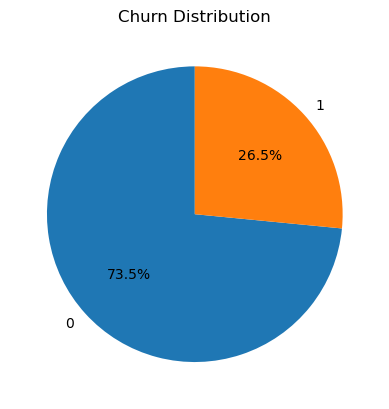

In [83]:
import matplotlib.pyplot as plt

# Plot churn distribution
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()


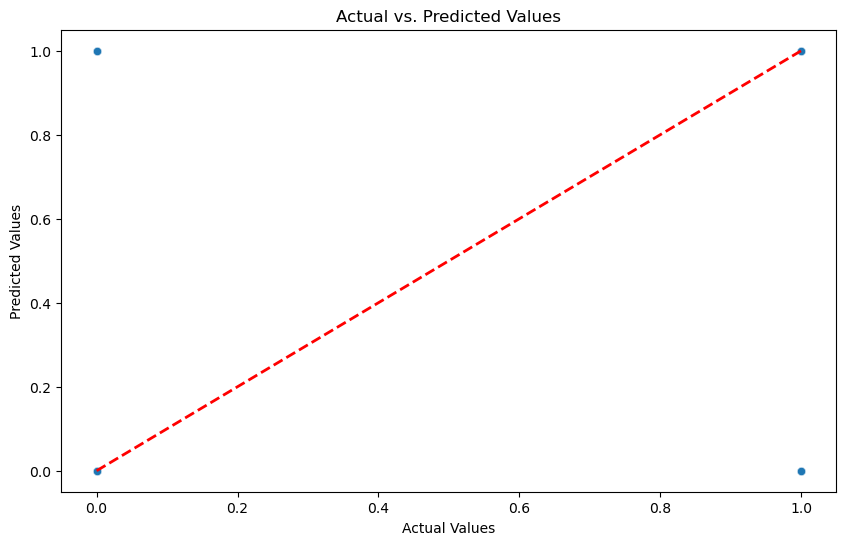

In [117]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


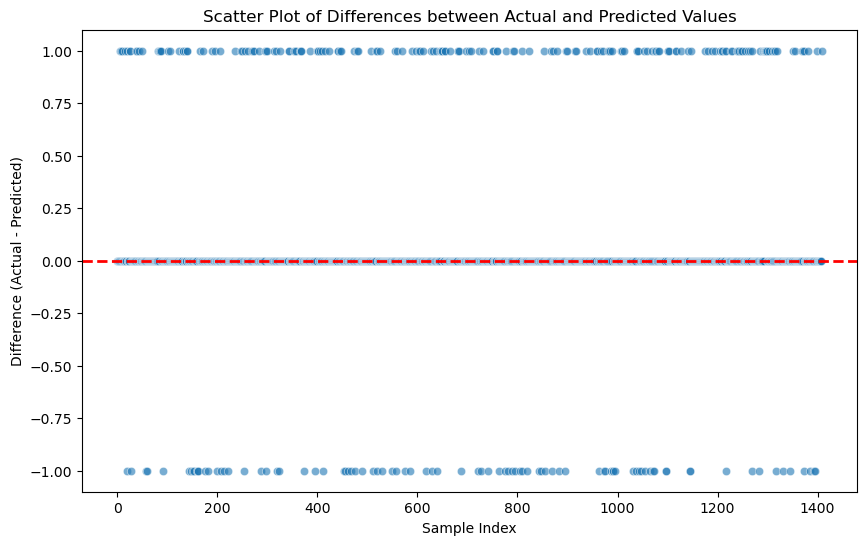

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the differences
differences = y_test - y_pred

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(differences)), differences, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Line at zero for reference
plt.xlabel('Sample Index')
plt.ylabel('Difference (Actual - Predicted)')
plt.title('Scatter Plot of Differences between Actual and Predicted Values')
plt.show()


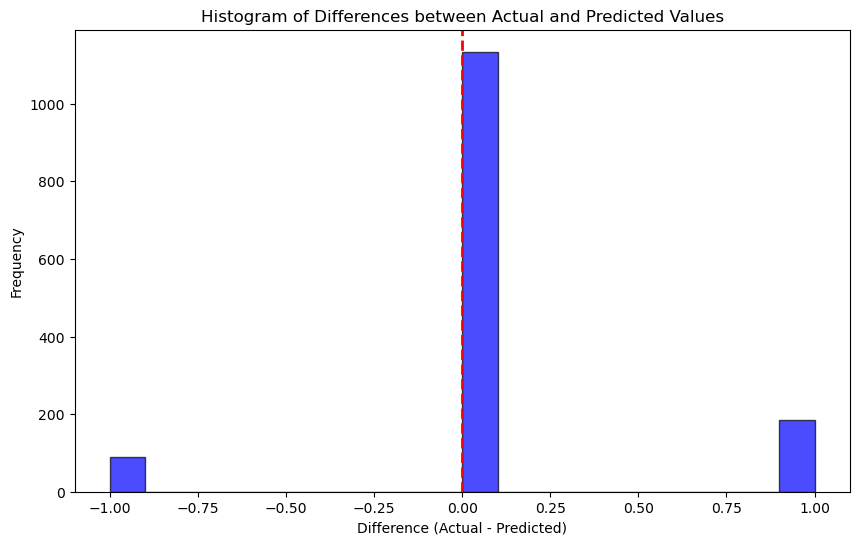

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the differences (residuals)
differences = y_test - y_pred

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(differences, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', linewidth=2)  # Line at zero for reference
plt.xlabel('Difference (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Histogram of Differences between Actual and Predicted Values')
plt.show()


In [125]:
'''
Plotly is a versatile library that enables the creation of a wide range of interactive charts and graphs, such as 
line plots, scatter plots, bar charts, and more. It's particularly well-suited for building complex visualizations that can be embedded in
web applications or Jupyter notebooks. 
Cufflinks acts as a bridge between Plotly and pandas, allowing for quick and easy plotting directly from DataFrame objects. 
This integration simplifies the process of generating interactive visualizations from your data. 

By integrating Plotly and Cufflinks into your project, you can enhance your data analysis with interactive and visually appealing charts,
facilitating a deeper understanding of your dataset.

'''
import pandas as pd
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

# Enable offline mode for interactive plots in Jupyter notebooks
cf.go_offline()


In [127]:
# Assuming y_test and y_pred are your actual and predicted values
df1 = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})


C:\Users\ashok\anaconda3\lib\site-packages\chart_studio\tools.py:290: SyntaxWarning:

"is" with a literal. Did you mean "=="?



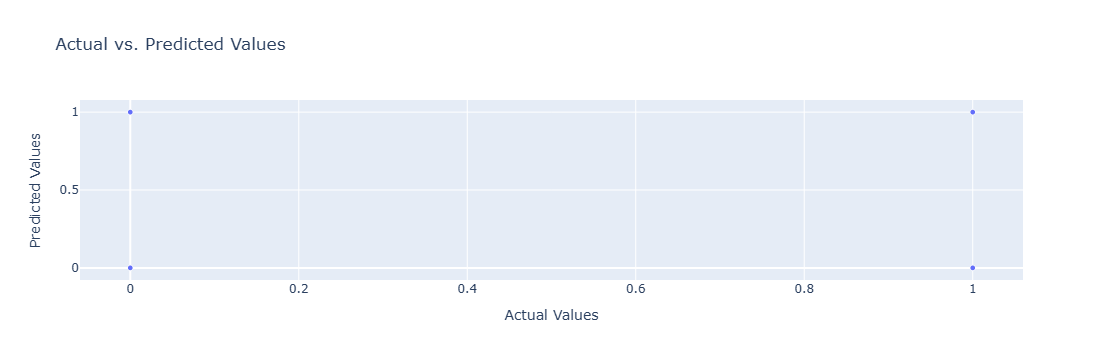

In [129]:
# Scatter plot of Actual vs. Predicted values
fig = px.scatter(df1, x='Actual', y='Predicted', title='Actual vs. Predicted Values')
fig.update_traces(marker=dict(size=5, opacity=0.6, line=dict(width=0.5, color='white')))
fig.update_layout(
    xaxis_title='Actual Values',
    yaxis_title='Predicted Values',
    showlegend=False
)
fig.show()


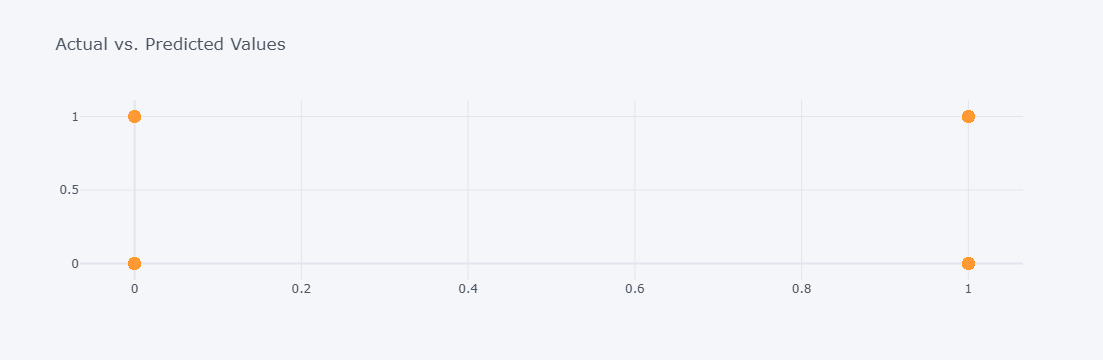

In [139]:
# Scatter plot of Actual vs. Predicted values using Cufflinks
df1.iplot(kind='scatter', x='Actual', y='Predicted', mode='markers', title='Actual vs. Predicted Values')


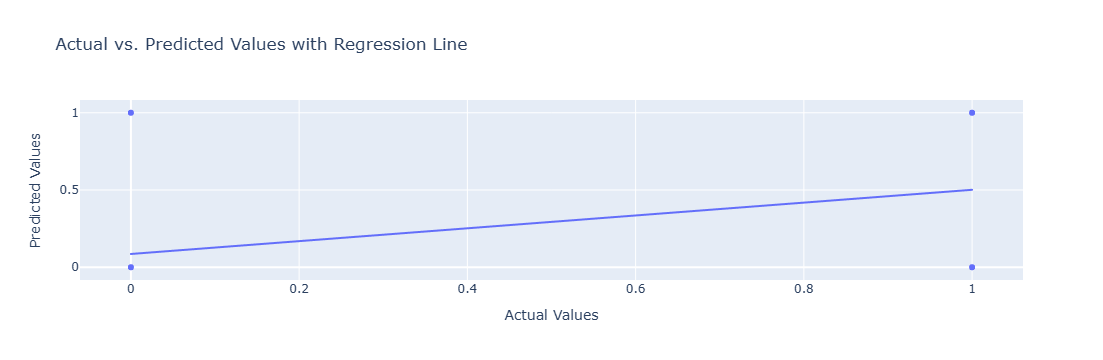

In [141]:
import plotly.express as px
import numpy as np
import pandas as pd

# Create DataFrame
df1 = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Scatter plot with regression line
fig = px.scatter(df1, x='Actual', y='Predicted', trendline='ols', title='Actual vs. Predicted Values with Regression Line')
fig.update_layout(
    xaxis_title='Actual Values',
    yaxis_title='Predicted Values',
    showlegend=False
)
fig.show()
